In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# ------- Run this few lines -------

In [2]:
url = 'sad.jpg'

In [3]:
import mycodes.emotionpred as emotion
import mycodes.genderpred as gender

In [4]:
emotion_model = emotion.load_model_dir("trained_models")
gender_model = gender.load_model_dir("trained_models")

/anaconda3/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [5]:
img = cv2.imread(url)
print(emotion.emotionof(emotion_model, img))
print(gender.genderof(gender_model, img))

('sad', 0.9975695)
('man', 1.0)


# -------------------------------------

In [6]:
img.shape

(390, 520, 3)

In [7]:
img = cv2.resize(img,(48,48))

In [8]:
img = img.mean(axis=2,keepdims=True)  # rgb to grayscale

In [9]:
img.shape

(48, 48, 1)

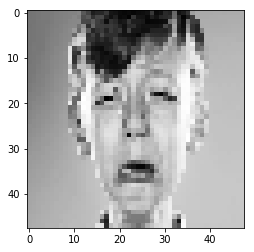

In [10]:
plt.imshow(np.squeeze(img),cmap='gray')

In [11]:
x = np.expand_dims(img,0)  # expand (48,48,1) to (1,48,48,1)

In [12]:
y_pred = emotion_model.predict(x)

In [13]:
labels = {0:'angry',1:'disgust',2:'sad',3:'happy',4:'sad',5:'surprise',6:'neutral'}

In [14]:
label = np.argmax(y_pred)
confidence = np.amax(y_pred)
print("Predicted label is '%s' with %f confidence." % (labels[label],confidence))

Predicted label is 'sad' with 0.997570 confidence.
